# Visualization and analysis of simulated building energy data - Case Study of a Shopping Mall in Dubai

- Developed by Clayton Miller (clayton@nus.edu.sg - miller.clayton@gmail.com)
- Simulation files and visualizations created by Miguel Martin (miguel.martin@u.nus.edu.sg)

Here is a tutorial for data analysis of simulated data from a building energy model like EnergyPlus. We will look at a scenario of a Mall based in Dubai, UAE

The goal of this notebook is to illustrate how to use output files from the EnergyPlus energy simulation engine to get an initial understanding of the Pandas DataFrame and functions



## The Pandas online cheat sheet

Throughout this and all future notebooks, we will refer to the Pandas function cheat sheet as a resource to help us understand the most important functions and how to use them

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

# Case Study -- Shopping Mall Design in Dubai

### The scenario for this analysis ia shopping mall project in Dubai. Imagine you are on the design team and are asked to design this building complex.  
- One of the biggest shopping mall of the world
- Located in United Arab Emirates (i.e. arid climate)
- Floor area is about 500,000 m2
- Number of visitors every year is around 90 million
- Building with tremendously high cooling energy demand

### There will be various decisions to make about which design options to integrate into the design

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-1.png?raw=true)

Miguel Martin (PhD student at NUS) has already created several EnergyPlus simulations of a prototype building form and produced results of monthly cooling energy. This set of tutorial videos will cover the ways to analyze the data from those simulations while learning the fundamentals of the Pandas library

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-2.png?raw=true)

The first thing we will do is use the pandas library to load the data set and analyze the data from the 'baseline' energy model. The units of this file is Cooling Energy GWh per month

First, we need to load the `pandas` library and load the `.csv` file


In [1]:
import pandas as pd

For Google Colab to find the simulation files in the Drive, we need to `mount` the drive to use the files in this notebook. We can use the `os` library to open the right folder in the Google drive

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')
import os

In [3]:
os.chdir("simulation_data")

We will take a look at all the files in folder using the `ls` command -- this command is typical of a linux command line and the Colab notebook let's use execute these types of commands in addition to Python

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E0C7-5C39

 Directory of C:\Users\Dennis\Documents\EDX Data Science for Construction, Architecture and Engineering\Week 2 - Building Design - Intro to Pandas\simulation_data

15/04/2020  08:35 AM    <DIR>          .
15/04/2020  08:35 AM    <DIR>          ..
07/07/2019  05:52 PM               169 Baseline.csv
23/08/2019  10:12 PM             3,974 Baseline.xlsx
07/07/2019  05:52 PM               186 Scenario - Aircon Schedules.csv
07/07/2019  05:52 PM               181 Scenario - Cool roof.csv
07/07/2019  05:52 PM               186 Scenario - Increase Setpoint.csv
07/07/2019  05:52 PM               184 Scenario - Low-E Glass.csv
07/07/2019  05:52 PM               186 Scenario - Rooftop Gardens.csv
               7 File(s)          5,066 bytes
               2 Dir(s)  121,320,448,000 bytes free


# Pandas DataFrame Object

Before we do this analysis, let's look at a generic DataFrame object created from data specificied in a line of source code

The following code creates a DataFrame object labelled `df`



In [5]:
df = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])

In [6]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


# Loading Data from files

Instead of creating DataFrames from scratch, we generally load data from various file types - the most common being files with the extension `.csv` or `.xlsx`. There are several pandas functions to both read and write data from and to various files. 

The following is a list of functions in pandas (https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html):

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-8.png?raw=true)

### First step, let's load the baseline `.csv` file:

In [7]:
baseline_data = pd.read_csv("Baseline.csv")

In [8]:
baseline_data

,Month,Baseline
0,January,5.69
1,February,6.75
2,March,10.64
3,April,13.60
4,May,19.34
5,June,22.64
6,July,27.02
7,August,27.13
8,September,25.04
9,October,18.47


Let's take a look at the attributes that we can set in a funcation like `.read_csv()`

Colab give us the ability to use features like *autocomplete*:
- Right now you will have to click on the "Try new features" icon in the far upper right hand corner of 
- Start typing `pd.read_csv()` and you will see the various autocomplete options

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-9.png?raw=true)

### Attribute tuning for `.read_csv()`

Right now, the file has been loaded, but let's make the `Month` column the index -- to do this we can use the attribute `index_col=`

In [9]:
baseline_data = pd.read_csv("Baseline.csv", index_col='Month')

In [10]:
baseline_data

,Baseline
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


# DataFrame Objects Overview

A DataFrame object is a multi-purpose two dimensional object that has dozens of functions that can be applied to it to see what's inside in different ways.

A DataFrame is made up of an `index` and a set of `columnts`. 

The DataFrame object allows us to put data in the **tidy data** format with variables as columns and observations as rows


In [11]:
baseline_data.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='Month')

In [12]:
baseline_data.columns

Index(['Baseline'], dtype='object')

The `.info()` object is useful in seeing a DataFrame in way that summarizes the number of columns and the type of data in that column. This view is also useful to understand if there are missing values

In [13]:
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Baseline  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


## Subset of Variables
Each column is a Pandas *Series* object - which we can select using the name of the column inside of brackets. In this case, there is only a single column. 

There are two ways to select a column within a DataFrame:


In [14]:
baseline_data['Baseline']

Month
January       5.69
February      6.75
March        10.64
April        13.60
May          19.34
June         22.64
July         27.02
August       27.13
September    25.04
October      18.47
November     13.02
December      7.53
Name: Baseline, dtype: float64

In [15]:
baseline_data.Baseline

Month
January       5.69
February      6.75
March        10.64
April        13.60
May          19.34
June         22.64
July         27.02
August       27.13
September    25.04
October      18.47
November     13.02
December      7.53
Name: Baseline, dtype: float64

## Subset of observations

We can see only the first or last few lines using `.tail()` and `.head()`

In [16]:
baseline_data.head()

,Baseline
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34


In [17]:
baseline_data.tail()

,Baseline
Month,
August,27.13
September,25.04
October,18.47
November,13.02
December,7.53


Rows in a DataFrame can be filtered using a conditional statement



In [18]:
baseline_data[baseline_data['Baseline'] > 10]

,Baseline
Month,
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04
October,18.47
November,13.02


We can get a random sample of the rows in the DataFrame

In [19]:
baseline_data.sample(frac=0.5)

,Baseline
Month,
September,25.04
December,7.53
March,10.64
October,18.47
July,27.02
April,13.60


In [20]:
baseline_data.sample(n=3)

,Baseline
Month,
January,5.69
October,18.47
July,27.02


### Sorting and Renaming a DataFrame

Sometimes we need to sort the observations in a certain column -- there are several functions for this purpose

In [21]:
baseline_data.sort_values('Baseline')

,Baseline
Month,
January,5.69
February,6.75
December,7.53
March,10.64
November,13.02
April,13.60
October,18.47
May,19.34
June,22.64


In [22]:
baseline_data.sort_index()

,Baseline
Month,
April,13.60
August,27.13
December,7.53
February,6.75
January,5.69
July,27.02
June,22.64
March,10.64
May,19.34


In [23]:
baseline_data.rename(columns={'Baseline':'Baseline Cooling Consumption in GWh'})

,Baseline Cooling Consumption in GWh
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


# Monthly Energy Visualization

Now that we've investigated various ways to slice and dice the DataFrame, let's take a look at the data in a visualization format.

### The **Baseline** simulation model is the design of the building with conventional design options. Let's take a look at the energy consumption per month:

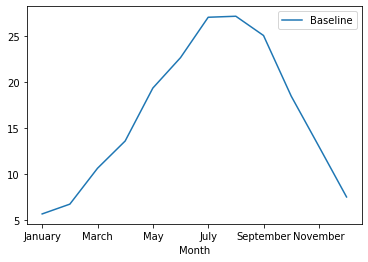

In [24]:
baseline_data.plot()

We can modify various parts of the graphic using attributes of the DataFrame and `.plot()` function

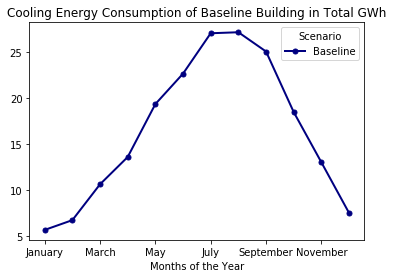

In [25]:
baseline_data.columns.name = 'Scenario'
baseline_data.index.name = 'Months of the Year'
baseline_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh')

# Overview of Design Option Scenarios

In this analysis, we will consider five additional sets of design options focused on various design options. 




# Compare two files -- Baseline vs. Different Scheduling

First let's take a look at one of the design options - the use of optimized schedules. Instead of the building operating 24/7, the building would have the cooling system on only during operating hours. Let's take a look at this comparison

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-3.png?raw=true)

First, let's get the data from that file

In [26]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E0C7-5C39

 Directory of C:\Users\Dennis\Documents\EDX Data Science for Construction, Architecture and Engineering\Week 2 - Building Design - Intro to Pandas\simulation_data

15/04/2020  08:35 AM    <DIR>          .
15/04/2020  08:35 AM    <DIR>          ..
07/07/2019  05:52 PM               169 Baseline.csv
23/08/2019  10:12 PM             3,974 Baseline.xlsx
07/07/2019  05:52 PM               186 Scenario - Aircon Schedules.csv
07/07/2019  05:52 PM               181 Scenario - Cool roof.csv
07/07/2019  05:52 PM               186 Scenario - Increase Setpoint.csv
07/07/2019  05:52 PM               184 Scenario - Low-E Glass.csv
07/07/2019  05:52 PM               186 Scenario - Rooftop Gardens.csv
               7 File(s)          5,066 bytes
               2 Dir(s)  127,604,338,688 bytes free


In [27]:
schedule_scenario = pd.read_csv("Scenario - Aircon Schedules.csv", index_col="Month")

In [28]:
schedule_scenario

,Scenario - Aircon Schedules
Month,
January,5.61
February,6.50
March,9.70
April,11.95
May,16.52
June,18.89
July,22.13
August,22.14
September,20.38


Let's take a look at the *Baseline* Scenario again

In [29]:
baseline_data

Scenario,Baseline
Months of the Year,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


Looks like the *Schedule* scenario uses less energy than the baseline - let's confirm this by combining the two DataFrames using the `.concat()` function

In [30]:
combined_data = pd.concat([baseline_data, schedule_scenario], axis=1)

In [31]:
combined_data

,Baseline,Scenario - Aircon Schedules
January,5.69,5.61
February,6.75,6.50
March,10.64,9.70
April,13.60,11.95
May,19.34,16.52
June,22.64,18.89
July,27.02,22.13
August,27.13,22.14
September,25.04,20.38
October,18.47,15.87


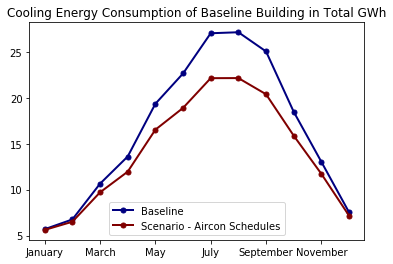

In [32]:
combined_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh')

# Make New Columns to Find the Difference between the options

Let's use a vector operation to create a new column to find the difference between the columns

In [33]:
combined_data['Difference'] = combined_data['Baseline'] - combined_data['Scenario - Aircon Schedules']

In [34]:
combined_data

,Baseline,Scenario - Aircon Schedules,Difference
January,5.69,5.61,0.08
February,6.75,6.50,0.25
March,10.64,9.70,0.94
April,13.60,11.95,1.65
May,19.34,16.52,2.82
June,22.64,18.89,3.75
July,27.02,22.13,4.89
August,27.13,22.14,4.99
September,25.04,20.38,4.66
October,18.47,15.87,2.60


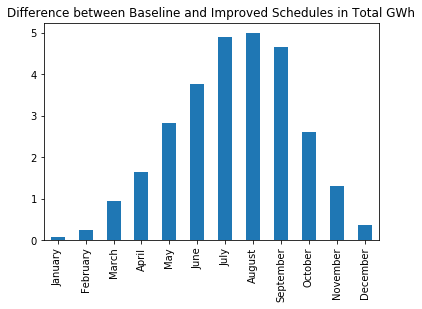

In [35]:
combined_data['Difference'].plot.bar(title='Difference between Baseline and Improved Schedules in Total GWh')

## Define a *function* object to create a new column

Let's say we only care to compare all the months except *July* -- we can define a function to calculate a new column

In [36]:
def get_difference_conditional(monthly_data):
  #print(monthly_data)
  if monthly_data.name == 'July':
    return 0
  else:
    return monthly_data['Baseline'] - monthly_data['Scenario - Aircon Schedules']

In [37]:
combined_data['Difference_NoJuly'] = combined_data.apply(lambda x: get_difference_conditional(x), axis=1)

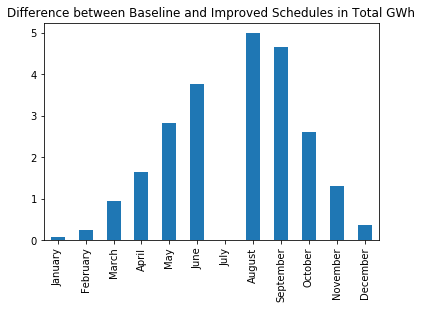

In [38]:
combined_data['Difference_NoJuly'].plot.bar(title='Difference between Baseline and Improved Schedules in Total GWh')

# Compare all of the options

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-4.png?raw=true)

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-5.png?raw=true)

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-6.png?raw=true)

![alt text](https://github.com/buds-lab/the-building-data-genome-project/blob/master/docs/edx-graphics/EDX-SimulationImage-7.png?raw=true)


## Use a `for` loop to load the files from all the scenarios

There are five more `.csv` files that have data from each simulation. We will use a `for` loop to get the data from each file. Again, we'll use the `os` library to get the names of the files so that we can loop through and grab them.

In [39]:
os.listdir()

['Baseline.csv',
 'Baseline.xlsx',
 'Scenario - Aircon Schedules.csv',
 'Scenario - Cool roof.csv',
 'Scenario - Increase Setpoint.csv',
 'Scenario - Low-E Glass.csv',
 'Scenario - Rooftop Gardens.csv']

Let's take the files out of this list that we want to analyze and put them in a *list* called `list_of_files`

In [40]:
list_of_files = ['Scenario - Aircon Schedules.csv',
 'Scenario - Cool roof.csv',
 'Scenario - Rooftop Gardens.csv',
 'Scenario - Increase Setpoint.csv',
 'Scenario - Low-E Glass.csv',
 'Baseline.csv']

In [41]:
list_of_files

['Scenario - Aircon Schedules.csv',
 'Scenario - Cool roof.csv',
 'Scenario - Rooftop Gardens.csv',
 'Scenario - Increase Setpoint.csv',
 'Scenario - Low-E Glass.csv',
 'Baseline.csv']

First let's loop through all the filenames just to show that we can

In [42]:
for filename in list_of_files:
  print(filename)

Scenario - Aircon Schedules.csv
Scenario - Cool roof.csv
Scenario - Rooftop Gardens.csv
Scenario - Increase Setpoint.csv
Scenario - Low-E Glass.csv
Baseline.csv


Now we can use the `.append()` function of Python *list* object and the `.concat()` function to loop through and get the data from each building

In [43]:
data_container = []
for filename in list_of_files:
  print(filename)
  df = pd.read_csv(filename, index_col='Month')
  data_container.append(df)

all_data = pd.concat(data_container, axis=1)

Scenario - Aircon Schedules.csv
Scenario - Cool roof.csv
Scenario - Rooftop Gardens.csv
Scenario - Increase Setpoint.csv
Scenario - Low-E Glass.csv
Baseline.csv


In [44]:
all_data

,Scenario - Aircon Schedules,Scenario - Cool roof,Scenario - Rooftop Gardens,Scenario - Increase Setpoint,Scenario - Low-E Glass,Baseline
Month,,,,,,
January,5.61,4.46,6.30,2.73,5.41,5.69
February,6.50,5.39,7.15,3.88,6.48,6.75
March,9.70,8.96,10.90,6.60,10.37,10.64
April,11.95,11.73,13.59,9.37,13.36,13.60
May,16.52,17.28,18.94,14.82,19.14,19.34
June,18.89,20.54,22.12,18.01,22.47,22.64
July,22.13,24.76,26.29,21.98,26.84,27.02
August,22.14,24.97,26.47,22.15,26.91,27.13
September,20.38,22.98,24.63,19.92,24.77,25.04


In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Scenario - Aircon Schedules   12 non-null     float64
 1   Scenario - Cool roof          12 non-null     float64
 2   Scenario - Rooftop Gardens    12 non-null     float64
 3   Scenario - Increase Setpoint  12 non-null     float64
 4   Scenario - Low-E Glass        12 non-null     float64
 5   Baseline                      12 non-null     float64
dtypes: float64(6)
memory usage: 672.0+ bytes


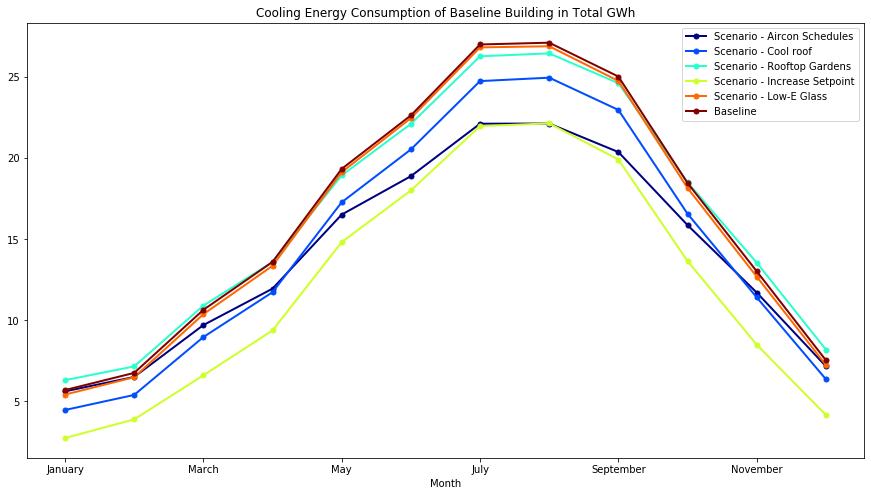

In [46]:
all_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh', figsize=(15,8))

## Using web-based resources to figure out how to do things

Now we have all the data in one DataFrame, but now what? I think we need to subtract the baseline from each column. I'm not sure how to do that.

In this situation, you can use the best coding assistant in history -- Google. 

Here is the top result of the google search "subtracting all columns in a dataframe by one column":

https://stackoverflow.com/questions/45383144/subtracting-many-columns-in-a-df-by-one-column-in-another-df

This stackoverflow site gives us guidance how to chain together a few functions together to get the result we want



### Chaining functions

Now we can chain a few functions together to see the total energy consumption reduction from each of the design options

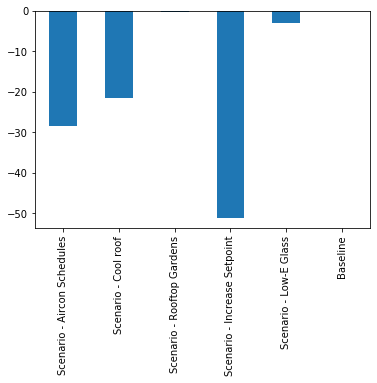

In [47]:
all_data.subtract(all_data['Baseline'], axis=0).sum().plot.bar()

Turns out that Increasing the setpoing is by far the most effective energy savings option! Schedules are second place and cool roof is third. The Rooftop gardens and Low-E glass seem to have only a bit of impact for this building

## Troubleshooting bugs using Stackoverflow

Soemtimes we run into bugs -- these are when we get errors from the Python kernel. 

For example, let's say that we want to use the `.drop()` function to remove some of the columns in a DataFrame. Let's give it a try:

In [48]:
all_data.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

We ran into an error! Colab is so helpful that it gives you a button to Google the error message on Stackoverflow -- we find a solution at this site: https://stackoverflow.com/questions/49979122/getting-valueerror-need-to-specify-at-least-one-of-labels-index-or-column

